In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import time
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import float32, zeros, ones, eye, as_tensor, tensor

from sbi.inference import MCMCPosterior, VIPosterior, ImportanceSamplingPosterior
from sbi.analysis import pairplot
from sbi.utils import mcmc_transform

from gbi.GBI import GBInference
from gbi.hh.train_gbi import MaeDistZ
import gbi.hh.utils as utils
from gbi.hh.HodgkinHuxley import HodgkinHuxley
from gbi.hh.HodgkinHuxleyStatsMoments import HodgkinHuxleyStatsMoments

### Main figure is with 1 Million simulations

In [58]:
mode = "1M"

In [59]:
obs_stats_ls, all_obs = utils.load_all_allen()

In [60]:
betas = [25.0, 80.0, 300.0]

In [61]:
with open(f"../../results/hh/notebook/{mode}/03_posterior_predictive_traces_gbi_allen.pkl", "rb") as handle:
    all_predictive_traces_gbi = pickle.load(handle)

### Setup simulator

In [62]:
true_params, labels_params = utils.obs_params(reduced_model=False)

list_cells_AllenDB = [518290966, 57, 0.0234 / 126]

ephys_cell = list_cells_AllenDB[0]
sweep_number = list_cells_AllenDB[1]
A_soma = list_cells_AllenDB[2]
junction_potential = -14

obs = utils.allen_obs_data(
    ephys_cell=ephys_cell, sweep_number=sweep_number, A_soma=A_soma
)
obs["data"] = obs["data"] + junction_potential
I = obs["I"]
dt = obs["dt"]
t_on = obs["t_on"]
t_off = obs["t_off"]

sim = HodgkinHuxley(
    I, dt, V0=obs["data"][0], reduced_model=False, cython=True, prior_log=False
)

### GBI

In [63]:
time_vec_obs = np.linspace(np.min(sim.t), np.max(sim.t), len(all_obs[0]["data"]))

In [64]:
def plot_samples(predictives):
    nsamples = 10
    nxo = 10
    
    fig, ax = plt.subplots(nsamples, nxo, figsize=(13, 8))
        
    for i in range(nxo):
        xo  = all_obs[i]
        _ = ax[0, i].plot(time_vec_obs, xo["data"], c="k")
        
        for j in range(1, nsamples):
            xo = predictives[i][j]
            _ = ax[j, i].plot(time_vec_obs, xo["data"], c="g")

            _ = ax[j, i].set_xlabel("")
            _ = ax[j, i].set_ylabel("")
            _ = ax[j, i].set_ylim([-100, 60])
            _ = ax[j, i].spines["left"].set_visible(False)
            _ = ax[j, i].spines["bottom"].set_visible(False)
            _ = ax[j, i].set_xticks([])
            _ = ax[j, i].set_yticks([])
    return fig, ax

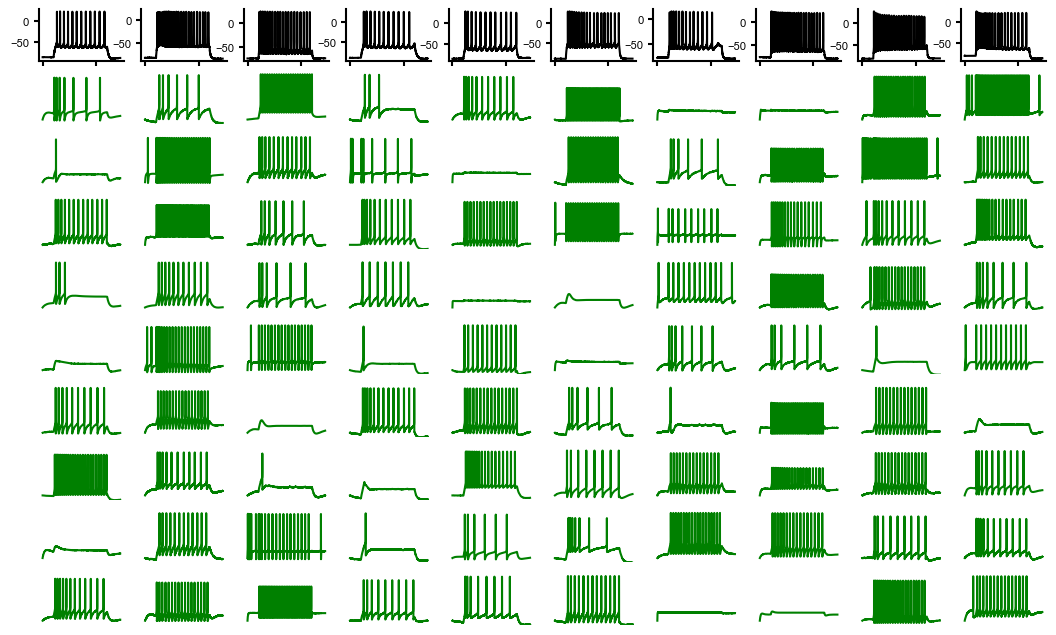

In [65]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plot_samples(all_predictive_traces_gbi["beta_25"])
    plt.savefig("svg/appendix2_panel_a.svg")
    plt.show()

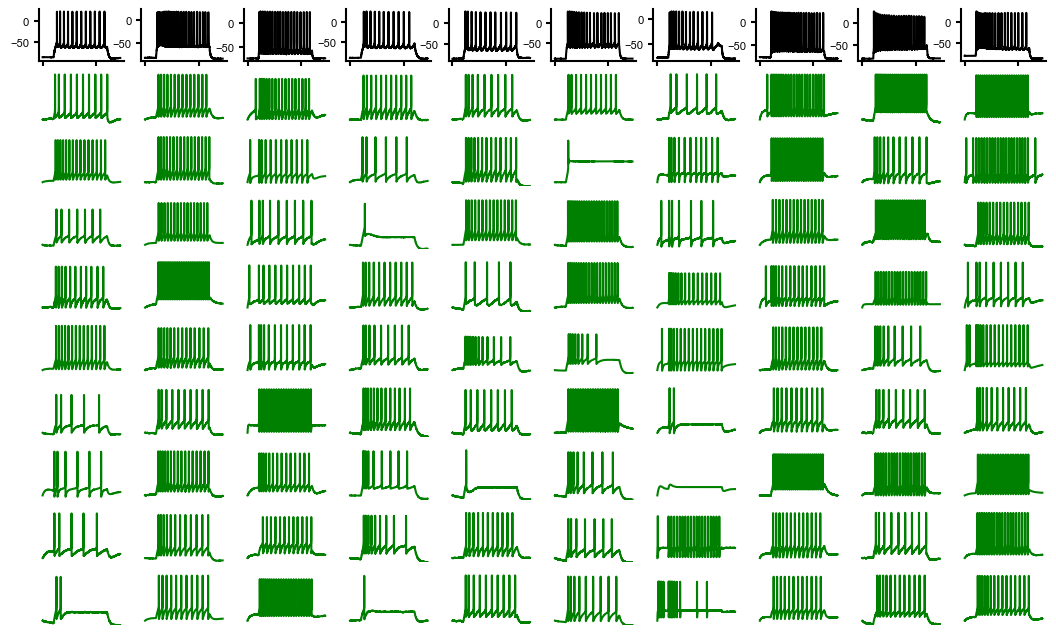

In [66]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plot_samples(all_predictive_traces_gbi["beta_50"])
    plt.savefig("svg/appendix2_panel_b.svg")
    plt.show()

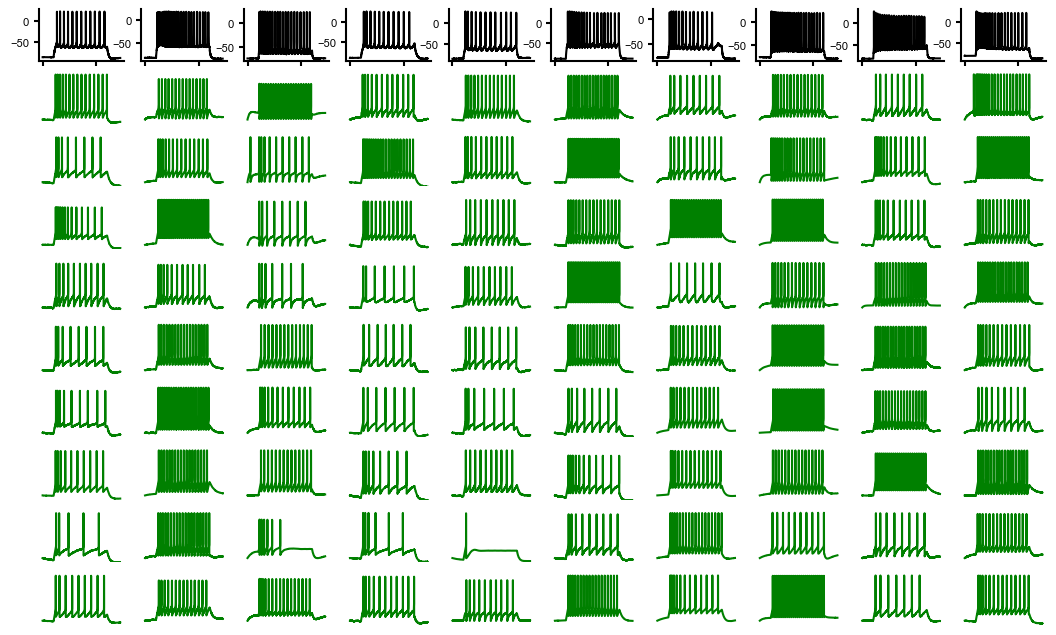

In [67]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plot_samples(all_predictive_traces_gbi["beta_100"])
    plt.savefig("svg/appendix2_panel_c.svg")
    plt.show()

### NPE

In [56]:
with open(f"../../results/hh/notebook/{mode}/04_npe_traces_amo.pkl", "rb") as handle:
    all_predictive_traces_npe = pickle.load(handle)

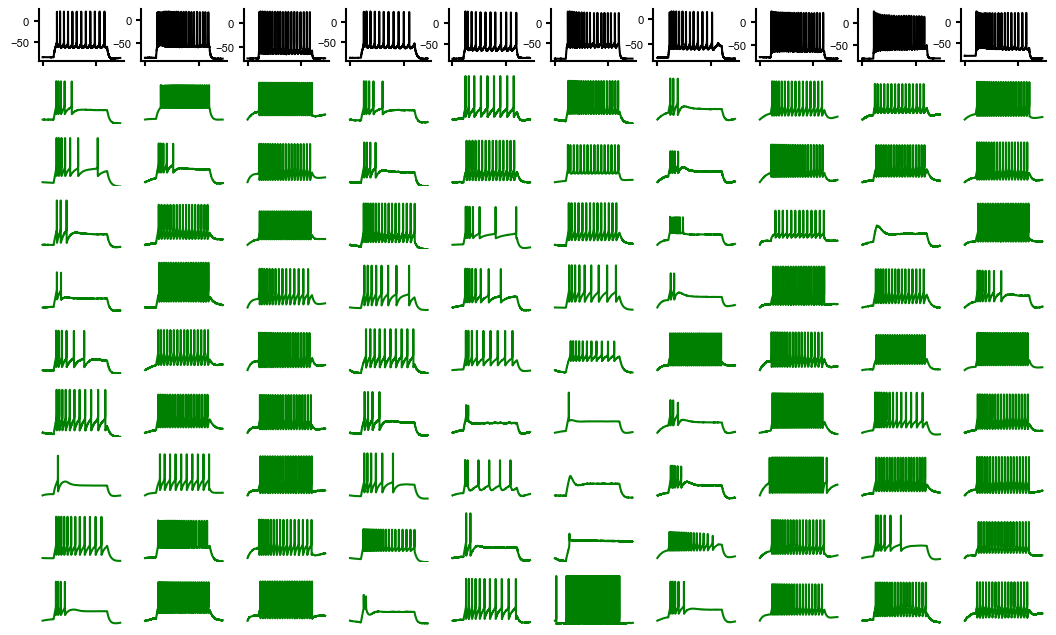

In [57]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plot_samples(all_predictive_traces_npe)
    plt.savefig("svg/appendix2_panel_a.svg")
    plt.show()